# Reproducing Kordon 2020 Results

## Generating the Data 

We rerun the experiments:
 - graph size from 5 to 100 step 5
 - for each graph size two type of graph low and high density
 - 150 run of each, we take the average.
 
The following command generates these numbers in a few minutes. This is much faster than the timing reported in Kordon and Tang 2020, the reason must be we implemented the algorithm in C++ instead of Python.

```bash
SAMPLE_COUNT=150 ../build/tests/BenchmarkTest > benchmarks.log
```

## Parsing the data and building the DataFrame

We open the CSV file using `pandas`, remove the header, and rename the columns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("benchmarks.log", skiprows=2,sep="\t", 
                 names=["n", "ltime", "liter", "lsize", "htime", "hiter", "hsize"])

df.describe()

,n,ltime,liter,lsize,htime,hiter,hsize
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,52.500000,106.180500,4.068000,0.578500,179.379000,3.917000,0.725000
std,29.580399,110.603026,1.042066,0.024554,187.323396,0.923518,0.037906
min,5.000000,0.020000,1.990000,0.520000,0.020000,1.990000,0.630000
25%,28.750000,14.937500,3.562500,0.570000,26.425000,3.415000,0.717500
50%,52.500000,66.195000,4.305000,0.585000,117.275000,4.230000,0.740000
75%,76.250000,166.882500,4.902500,0.592500,282.577500,4.525000,0.742500
max,100.000000,357.240000,5.310000,0.610000,559.350000,5.070000,0.760000


## Reproduce Figures

### Helpers

In [2]:
def plot_low_high (item, deg) :
    x  = df["n"]
    y1 = df["l" + item]
    y2 = df["h" + item]

    xspace = np.linspace(x.min(),x.max())

    _ = plt.plot(x,y1,marker='o', linewidth=0, markersize=1)
    _ = plt.plot(x,y2,marker='o', linewidth=0, markersize=1)


    fitcoef1 = np.polyfit(x,y1, deg = deg)
    fitcoef2 = np.polyfit(x,y2, deg = deg)

    plt.plot(xspace, np.poly1d(fitcoef1)(xspace))
    plt.plot(xspace, np.poly1d(fitcoef2)(xspace))


### Figure  10: Average running times w.r.t. the number of nodes

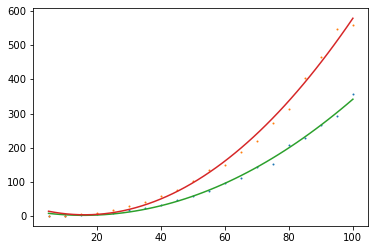

In [3]:
plot_low_high ("time", 2) 

### Figure  11: Average number of iteration w.r.t. the number of nodes

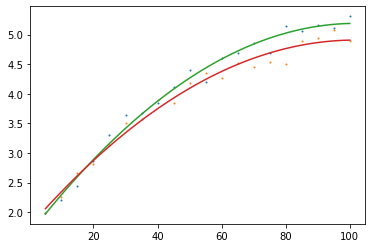

In [4]:
plot_low_high ("iter", 2) 

### Figure  12: Average ratio for the partial expanded graph w.r.t. the number of nodes

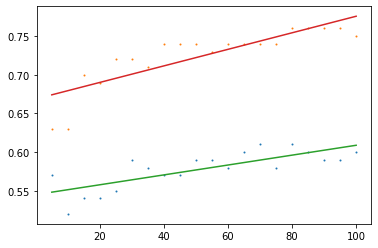

In [10]:
plot_low_high ("size", 1) 